In [11]:
import netCDF4
from pathlib import Path

input_directory = Path("../data")

In [12]:
data_set = netCDF4.Dataset(input_directory / "sic_OImon_MPI-ESM-LR_rcp85_r1i1p1_200601-210012.nc", "r")

# Convert time numbers to dates

In [19]:
data_set['time'].units

'days since 1850-1-1 00:00:00'

In [24]:
help(netCDF4.num2date)

Help on built-in function num2date in module cftime._cftime:

num2date(...)
    num2date(times,units,calendar='standard')
    
    Return datetime objects given numeric time values. The units
    of the numeric time values are described by the `units` argument
    and the `calendar` keyword. The returned datetime objects represent
    UTC with no time-zone offset, even if the specified
    `units` contain a time-zone offset.
    
    **`times`**: numeric time values.
    
    **`units`**: a string of the form `<time units> since <reference time>`
    describing the time units. `<time units>` can be days, hours, minutes,
    seconds, milliseconds or microseconds. `<reference time>` is the time
    origin.
    
    **`calendar`**: describes the calendar used in the time calculations.
    All the values currently defined in the
    [CF metadata convention](http://cfconventions.org)
    Valid calendars `'standard', 'gregorian', 'proleptic_gregorian'
    'noleap', '365_day', '360_day', 'jul

## Let's put that into a function

In [22]:
def get_dates(data_set):
    """Obtain `datetime.datetime` objects from the `'time'` axis of a NetCDF `DataSet`."""
    return netCDF4.num2date(data_set['time'][:], data_set['time'].units)

In [23]:
get_dates(data_set)

array([datetime.datetime(2006, 1, 16, 12, 0),
       datetime.datetime(2006, 2, 15, 0, 0),
       datetime.datetime(2006, 3, 16, 12, 0), ...,
       datetime.datetime(2100, 10, 16, 12, 0),
       datetime.datetime(2100, 11, 16, 0, 0),
       datetime.datetime(2100, 12, 16, 12, 0)], dtype=object)

# Plotting with Cartopy

In [25]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

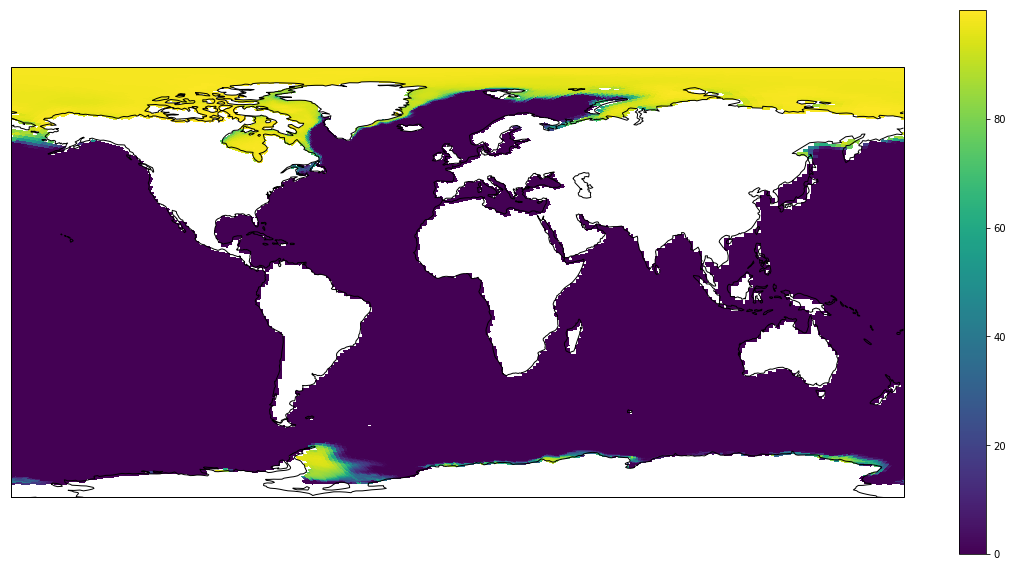

In [32]:
transform=ccrs.RotatedPole(pole_longitude=180.0, pole_latitude=90)
projection=ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(
    data_set['lon'][:], data_set['lat'][:], data_set['sic'][0],
    transform=transform)
ax.coastlines()
fig.colorbar(pcm)

## Save typing by writing a function!

In [86]:
def earth_plot(
        data_set, variable, time_index, *,
        transform=ccrs.RotatedPole(pole_longitude=180.0, pole_latitude=90),
        projection=ccrs.PlateCarree(), cblabel=None):
    """Create a plot from the `data_set`, using the given transform and projection."""
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection=projection)
    pcm = ax.pcolormesh(
        data_set['lon'][:], data_set['lat'][:], data_set[variable][time_index],
        transform=transform)
    ax.coastlines()
    ax.gridlines()
    fig.colorbar(pcm, label=cblabel or variable)
    return fig, ax

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f5f5d33de10>)

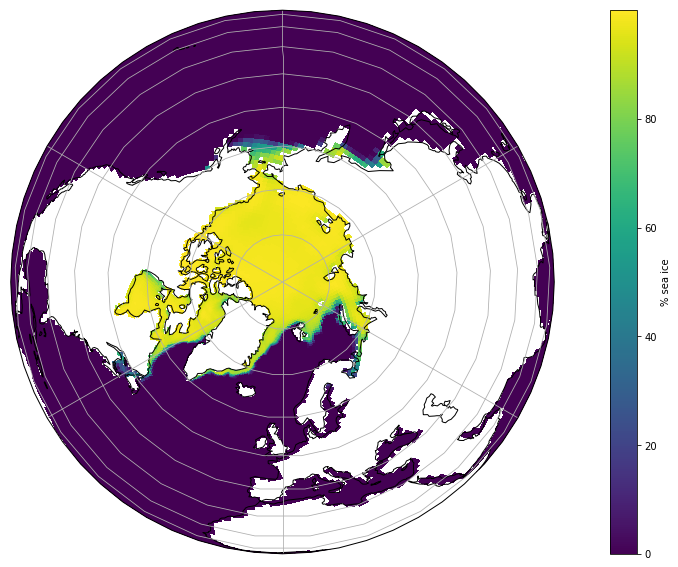

In [87]:
earth_plot(data_set, 'sic', 0, projection=ccrs.Orthographic(central_latitude=90), cblabel='% sea ice')

# Check the North Pole

In [43]:
north_pole = np.unravel_index(np.argmax(data_set['lat'][:]), data_set['lat'].shape)

In [48]:
sic_np = data_set['sic'][:,north_pole[0],north_pole[1]].data

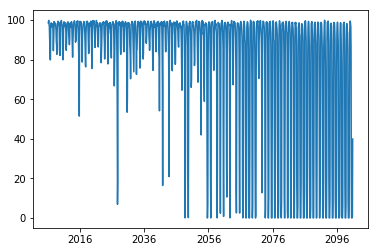

In [59]:
plt.plot(get_dates(data_set), sic_np)

Text(0.5,1,'% sea ice at NP in August')

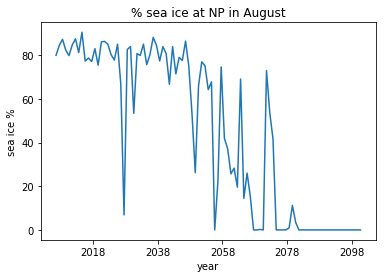

In [68]:
fig, ax = plt.subplots()
ax.plot(get_dates(data_set)[7::12], sic_np[7::12])
ax.set_xlabel('year')
ax.set_ylabel('sea ice %')
ax.set_title('% sea ice at NP in August')